
# Busqueda por Profundidad
A continuacion se ejemplifica la busqueda por profundidad revisada en clase. Para ello se tiene un ejemplo de la solucion de un Puzzle utilizando recursividad


In [15]:
# Busqueda en Profundidad

# Creamos la clase Nodo
class Node:
    def __init__(self, data, child=None): # Constructor de la clase
        self.data = data
        self.child = None
        self.fathr = None
        self.cost = None
        self.set_child(child)

    def set_child(self, child): # Agregar hijos
        self.child = child
        if self.child is not None:
            for ch in self.child:
                ch.fathr = self
            
    def equal(self, node): # Igual al equals de Java
        if self.data == node.data:
            return True
        else:
            return False

    def on_list(self, node_list): # Verfiicar su el nodo esta en la lista
        listed = False
        for n in node_list:
            if self.equal(n):
                listed = True
        return listed

    def __str__(self): # Igual al toString Java
        return str(self.data)

In [16]:
# Implementacion del metodo de busqueda por profundidad
def search_profundidad(init_node, solution, visited):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        son = [node_data[1], node_data[0], node_data[2], node_data[3]]
        izq = Node(son)
        son = [node_data[0], node_data[2], node_data[1], node_data[3]]
        centro = Node(son)
        son = [node_data[0], node_data[1], node_data[3], node_data[2]]
        der = Node(son)
        init_node.set_child([izq, centro, der])

        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                Solution = search_profundidad(node_son, solution, visited) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = [4, 2, 3, 1] # Creamos un estado inicial
solution = [1, 2, 3, 4] # La solucion que debe buscar
#Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(init_state)
node = search_profundidad(init_node, solution, visited) # Llamamos la metodo de busqueda

# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

[[4, 2, 3, 1], [2, 4, 3, 1], [2, 3, 4, 1], [3, 2, 4, 1], [3, 4, 2, 1], [4, 3, 2, 1], [4, 3, 1, 2], [3, 4, 1, 2], [3, 1, 4, 2], [1, 3, 4, 2], [1, 4, 3, 2], [4, 1, 3, 2], [4, 1, 2, 3], [1, 4, 2, 3], [1, 2, 4, 3], [2, 1, 4, 3], [2, 1, 3, 4], [1, 2, 3, 4]]


## Practica

Implementar un algoritmo que me permita dibujar la busqueda de soluciones.
Mediante el uso de la herramienta de Google Maps tomar al su direccion domiciliaria como punto de partida y generar un arbol jerarquico con todos los posibles Centros educativos, para ello se debe tener como primer nivel los mas cercanos y a continuacion los demas.



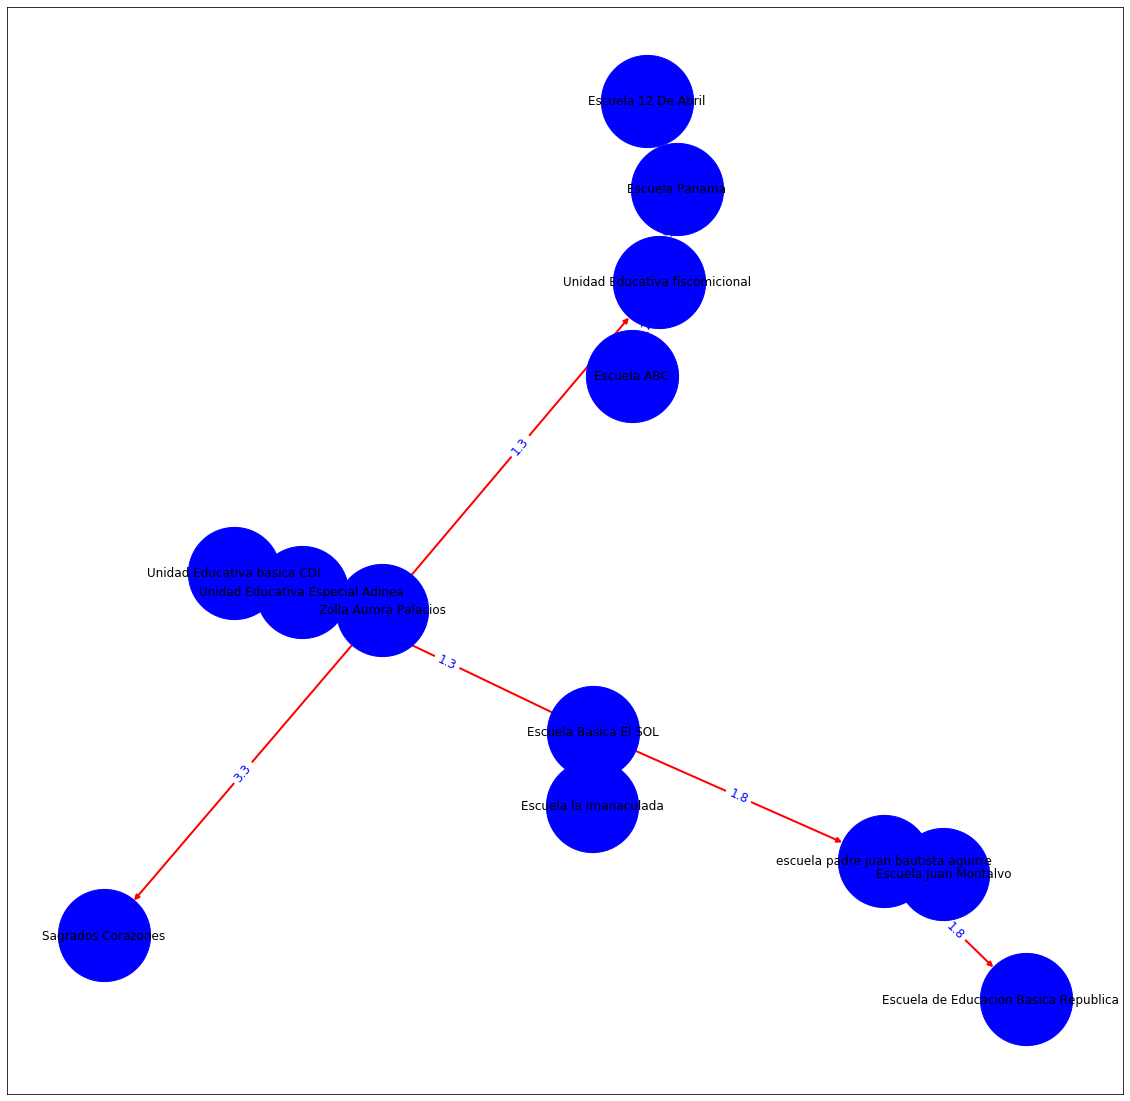

In [27]:
import networkx as nx
import numpy as np
import matplotlib.pyplot as plt


connections  = {
        'Escuela la Imanaculada': {'Escuela Basica El SOL': 1.6, },
    'Escuela Basica El SOL': {'Escuela la Imanaculada': 1.6,'Unidad Educativa Especial Adinea':1.3, 'escuela padre juan bautista aguirre':1.8}, 
    'Unidad Educativa Especial Adinea': {'Unidad Educativa basica CDI':1.3,'Zolla Aurora Palacios':1.5},
    'Unidad Educativa basica CDI': {'Unidad Educativa Especial Adinea':1.3},
    'Zolla Aurora Palacios': {'Sagrados Corazones':3.3, 'Unidad Educativa fiscomicional ':1.3},
    'Unidad Educativa fiscomicional ': {'Escuela ABC':8.2,'Escuela Panama':1.5},
    'Escuela Panama': {'Escuela 12 De Abril':2.2},
    'Escuela ABC': {'Unidad Educativa fiscomicional ':8.2},  
    'escuela padre juan bautista aguirre': {'Escuela Juan Montalvo':5.6,'Escuela de Educacion Basica Republica de chile':1.8},
    'Escuela Juan Montalvo': {'escuela padre juan bautista aguirre':5.6}
}


graf = nx.DiGraph()
graf.add_nodes_from(connections)
for valor, listaValor in connections.items():
    for a in listaValor:
        graf.add_edge(valor,a,size=250,length=str(listaValor[a]))
    
pos = nx.spring_layout(graf)
plt.figure(figsize=(20,20)) 
labels = nx.get_edge_attributes(graf,'length')
nx.draw_networkx(graf, 
                pos,
                node_color="blue",
                edge_color="red",
                font_size=12,
                width=2, 
                with_labels=True, 
                node_size=8500)
nx.draw_networkx_edge_labels(graf,
                            pos,
                            edge_labels=labels,
                            font_color='blue',
                            font_size=12)
plt.show()

In [22]:
#Definimos una funcion para obtener el costo - CompareTo (Java)
def Compare(node):
    return node.cost

['Escuela la Imanaculada', 'Escuela Basica El SOL', 'Unidad Educativa Especial Adinea', 'Zolla Aurora Palacios', 'Unidad Educativa fiscomicional ', 'Escuela Panama']
Costo total: 8.5


(-1.1132530101127334,
 1.1439042605217624,
 -1.0794988211639607,
 0.832741460065557)

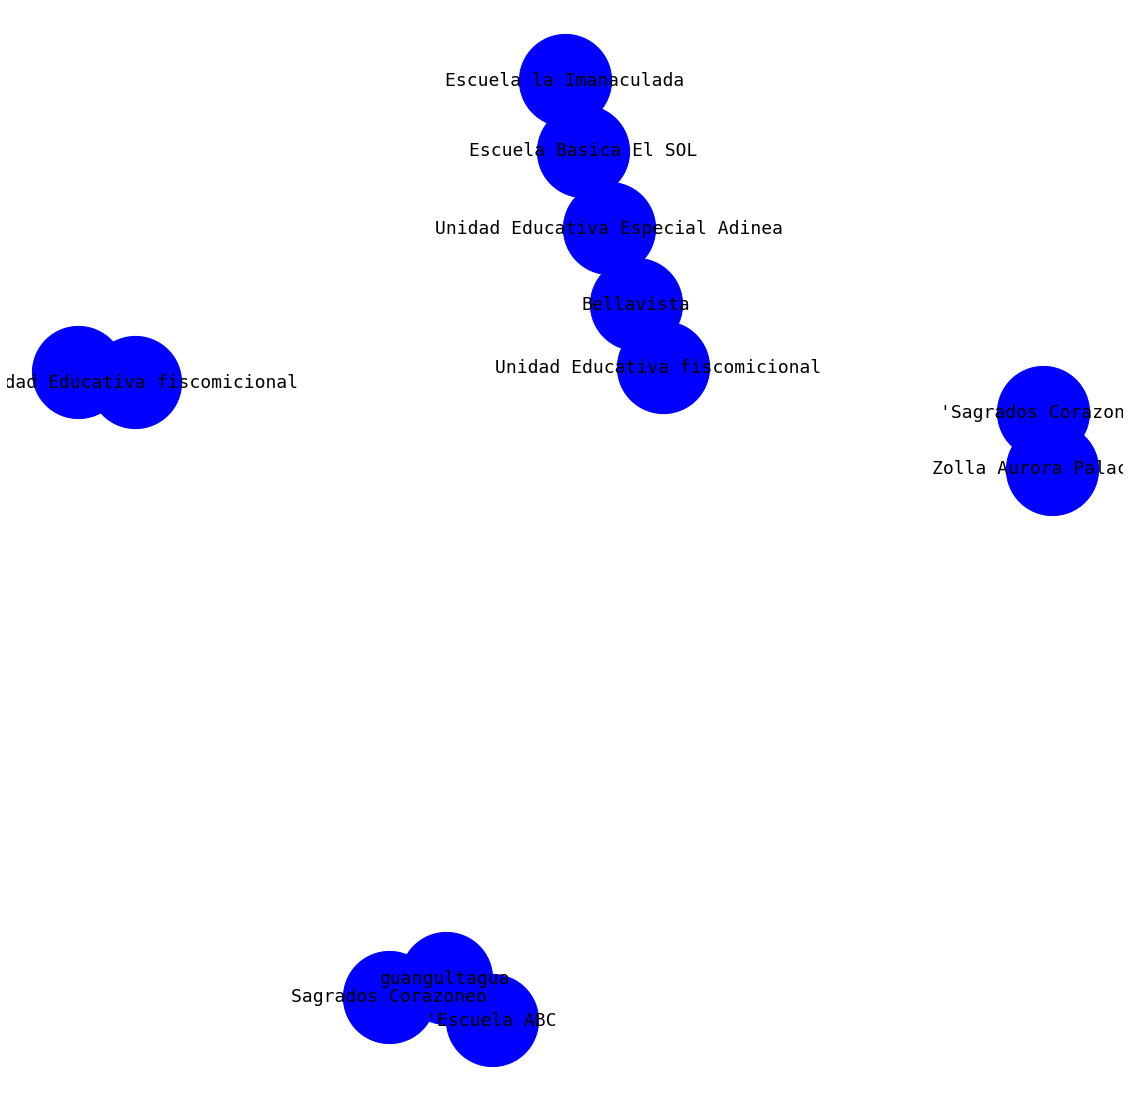

In [37]:

import os

os.environ['PATH'] = os.environ['PATH']+';'+os.environ['CONDA_PREFIX']+r"\Library\bin\graphviz"

import networkx as nx
import matplotlib.pyplot as plt
from IPython.display import Image, display

Grafo=nx.DiGraph()
#Agremamos el parametro g, de grafo para no tener que agregar la lista de localidades depues
def search_profundidad1(init_node, solution, visited,con,costo,g):
    visited.append(init_node.data)
    if init_node.data == solution: 
        init_node.cost=round(costo,2)
        g.add_node(init_node.data,color='red')
        return init_node 
    else: 
        
        node_data = init_node.data
        child_list=[]
        for node in con[node_data]:
            child = Node(node)
            cost = con[node_data][node]
            child.cost=round(cost,2)
            child_list.append(child)
        child_list = sorted(child_list, key=Compare)
        init_node.set_child(child_list)
        for son in init_node.child:
            if not son.data in visited:
                costo=costo+son.cost
                #Add rama grafica
                g.add_edge(init_node.data,son,label=costo)
                Solution = search_profundidad1(son, solution, visited,con,costo,g) 
                if Solution is not None:
                    return Solution
        return None

init_state = 'Escuela la Imanaculada' 
solution = 'Escuela Panama' 
solution_node = None 
visited = []
init_node = Node(init_state)  
costo = 0
node = search_profundidad1(init_node, solution, visited,connections,costo,Grafo)
result = []
if node is not None:
    fcosto=node.cost
    while node.fathr is not None:
        result.append(node.data)
        node = node.fathr
    result.append(init_state)
    result.reverse() 
    print(result)
    print("Costo total: %s" % str(fcosto)) 
else:
    print("No hay solucion")


import matplotlib.pyplot as plt
import networkx as nx
import warnings
warnings.filterwarnings('ignore')
   
gf = nx.Graph()
gf.add_edge("Escuela Basica El SOL","Escuela la Imanaculada", label = '1.6')
gf.add_edge("Escuela Basica El SOL","Unidad Educativa Especial Adinea", label = '1.3')
gf.add_edge("Unidad Educativa Especial Adinea","Bellavista", label = '1.8')
gf.add_edge("Bellavista","Unidad Educativa fiscomicional ", label = '1.6')
gf.add_edge("Zolla Aurora Palacios'","'Sagrados Corazones", label = '1.3')
gf.add_edge("Sagrados Corazoneo","guangultagua", label = '1.6')
gf.add_edge("'Unidad Educativa fiscomicional ","", label = '1.8')
gf.add_edge("guangultagua","'Escuela ABC", label = '1.7')

etiquetas = [gf[u][v]['label'] for u,v in gf.edges()]
plt.figure(4,figsize=(20,20)) 
pos =nx.spring_layout(gf)
nx.draw_networkx_nodes(gf, pos, node_size=8500, node_color='blue')
nx.draw_networkx_edges(gf, pos, edge_color='red') 
nx.draw_networkx_edge_labels(gf,pos,edge_labels={(u,v):gf[u][v]['label'] for u,v in gf.edges()} ,font_color='blue')

nx.draw_networkx_labels(gf, pos, font_family='monospace',
       node_color="blue",
                 edge_color="red",
                 font_size=18,
                 width=4, 
                 with_labels=True, 
                 node_size=8500) 
plt.axis('off')




Realizar un metodo de busqueda para encontrar la solucion de colocar en un tablero las 4 reinas.

Subir el cuaderno con la resolucion.

In [ ]:
import numpy as np
# Implementacion del metodo de busqueda por profundidad
def search_profundidad(init_node, solution, visited):
    visited.append(init_node.data) #Lista de visitados
    if init_node.data == solution: # Condicion de salida recursividad (Encontro la solucion)
        return init_node # Retorno el nodo resultado
    else:
        # Expandir nodos sucesores (hijos)
        node_data = init_node.data
        son = [[node_data[1], node_data[0], node_data[0], node_data[0]],
              [node_data[0], node_data[1], node_data[0], node_data[0],
             [node_data[0], node_data[0], node_data[1], node_data[0],
                [node_data[0], node_data[0], node_data[0], node_data[1]]
              
        izq = Node(son)
        son = [[node_data[0], node_data[1], node_data[0], node_data[0],
              [node_data[0], node_data[0], node_data[1], node_data[0],
             [node_data[0], node_data[0], node_data[0], node_data[1],
                [node_data[1], node_data[0], node_data[0], node_data[0]]
        centro = Node(son)
        son = [[node_data[1], node_data[0], node_data[0], node_data[0],
              [node_data[0], node_data[1], node_data[0], node_data[0],
             [node_data[0], node_data[0], node_data[1], node_data[0],
            [node_data[0], node_data[0], node_data[0], node_data[1]]
        der = Node(son)
        init_node.set_child([izq, centro, der])

        for node_son in init_node.child: # Recorrer los nodos hijos
            if not node_son.data in visited: # No deben estar en los nodos visitados
                # Llamada Recursiva
                Solution = search_profundidad(node_son, solution, visited) 
                if Solution is not None: # Cuando encuentra una solucion
                    return Solution # Retornamos la solucion encontrada
        return None

init_state = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]] # Creamos un estado inicial
solution = [[1,0,0,0],[0,0,1,0],[1,0,0,0],[0,0,0,1]]   # La solucion que debe buscar

i = np.array(init_state)
s = np.array(solution)
              
              #Inicializamos las variables
solution_node = None 
visited = []
init_node = Node(i)
node = search_profundidad(i, s, visited) # Llamamos la metodo de busqueda

# Mostrar Resultado
result = []
while node.fathr is not None:
    result.append(node.data)
    node = node.fathr
result.append(init_state)
result.reverse() # Reverso el resultado (Solo para presentar)
print(result)

In [63]:
import numpy as np
init_state = [[0,0,0,0],[0,0,0,0],[0,0,0,0],[0,0,0,0]] # Creamos un estado inicial
solution = [[1,0,0,0],[0,0,1,0],[1,0,0,0],[0,0,0,1]]  # La solucion que debe buscar

i = np.array(init_state)
s = np.array(solution)
print(s)


[[1 0 0 0]
 [0 0 1 0]
 [1 0 0 0]
 [0 0 0 1]]


# Conclusiones

la busqueda por profundida es muy efectiva dependiendo el numero 
de ramas que tenga a mayor numero de ramas mayor sera el esfuerzo.

